# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

#### Setup

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from IPython.display import display

from matplotlib import rcParams
sns.set(style='ticks', palette='Set2')

In [4]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [6]:
pd.set_option('display.max_columns', 9999)

#### Dataset

In [8]:
df.head(1)

,temperature,gender,heart_rate
0,99.3,F,68.0


#### Explore dataset

In [9]:
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

In [24]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [23]:
df.isnull().values.any()

False

#### 1. Is the distribution of body temperatures normal?

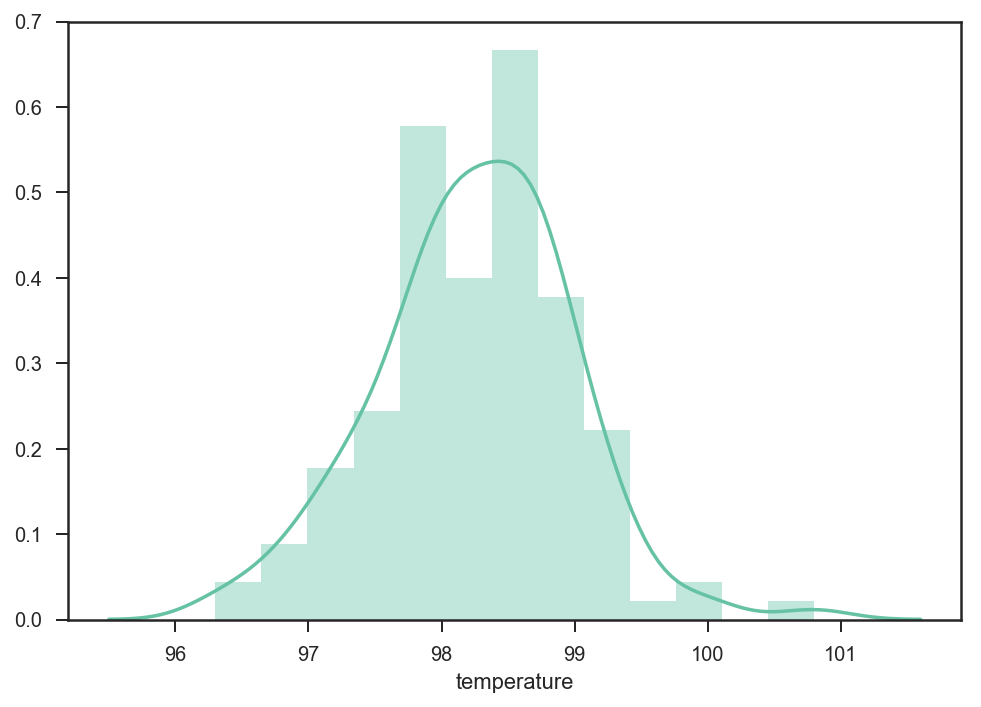

In [28]:
d_temp = df['temperature'].sort_values()
sns.distplot(d_temp)

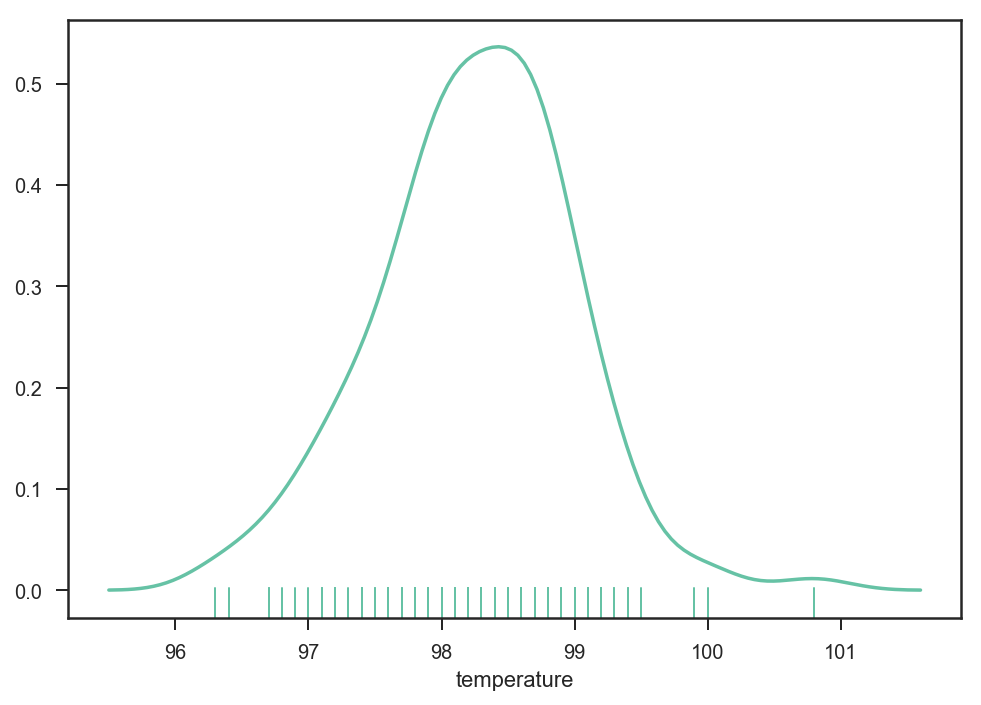

In [29]:
sns.distplot(d_temp, hist=False, rug=True)

**Conclusion:**  
The distribution of temperature is a bell shaped curve.  
The peak point is between 98 and 99$^{\circ}$F  
Our distribution is Gaussian or normal distribution. 

#### 2. Is the sample size large? Are the observations independent?

If the dataset is more than 30 the size is large.

#### 3. Is the true population mean really 98.6 degrees F?

In [53]:
# Calculate mean

print('Mean: %.2f' % (np.mean(df.temperature)) )

Mean: 98.25


**Hypothesis:**  
$H_0$ = the population mean is 98.6$^{\circ}$F with 95% coffidence  
$H_1$ = the population mean is not 98.6$^{\circ}$F with 95% coffidence

In [58]:
from scipy import stats
import numpy as np

a= df.temperature

mean, sigma = np.mean(a), np.std(a)

conf_int = stats.norm.interval(0.95, loc=mean)
print('conf_int: %.2f %.2f' % conf_int)

conf_int: 96.29 100.21


**Conclusion:**  
We failed to reject $H_0$

#### 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [64]:
mean, sigma = np.mean(a), np.std(a)
print("temperature < %.2f or temperature > %.2f" % (mean-2*sigma, mean+2*sigma))

temperature < 96.79 or temperature > 99.71


#### 5. Is there a significant difference between males and females in normal temperature?

In [72]:
males_temp = df.query('gender=="M"').temperature.values
females_temp = df.query('gender=="F"').temperature.values

from scipy.stats import ttest_ind
ttest_ind(males_temp, females_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

**Conclusion:**  
The two populations are not significantly different within a 95% confidence interval